In [1]:
import math, pylab
import numpy as np
import pandas as pd
import scipy.stats as stats
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as pdr

# Statistical experiments and significance testing

Design of experiments is a cornerstone of statistics

Experiments confirm or reject a hypothesis

Data scientists conduct experiments around user interface and product marketing

*Inference* is applying experiment results based on a sample to the broader population

Classical statistical inference "pipeline"

*Formulate hypothesis -> Design experiment -> Collect data -> Inference/conclusions*

---

## A/B testing

- **Treatment** - something to which a subject is exposed (drug, price, web layout, etc.)

- **Treatment group** - group of subjects exposed to specific treatment

- **Control group** - group of subjects exposed to no treatment or standard treatment

- **Randomization** - process of randomly assigning subjects to treatments

- **Subjects** - item/people that are exposed to treatments (web users, drug users, etc.)

- **Test statistic** - metric used to measure the effect of the treatment

A/B tests are common in web design and marketing

E.g. testing two web layouts to see what produces more clicks or conversions

Most common test statistic in A/B testing is a binary variable: click or no click, buy or no buy, drug worked or drug didn't work.

A continuous variable as the test statistic would have metrics like mean and standard deviation.

### Why have a control group?

Why not just roll out a change to all users, and compare against past experience?

Other factors might affect the outcome.

*Blind study* is when subjects don't know if they are getting treatment A or treament B

*Double blind study* is when subjects don't know, AND researchers don't know which subjects get which treatment

In web context, treatments include design, price, wording, etc.

In web context, measuring clicks, purchases, visit duration, number of pages visiited, whether a particular page is visited, etc.

Best to choose the test statistic before the experiment, to avoid researcher bias.

### Why just A/B? Why not C, D... ?

A/B tests are popular but not the only type of experiment

*Multi-arm bandit algorithm* is used to look at multiple options

- subjects are assigned to 2 (or more) groups that are treated exactly alike, except for the treatment

- ideally, subjects are assigned randomly to the groups

---

## Hypothesis tests

- **Null hypothesis** - hypothesis that chance is to blame

- **Alternative hypothesis** - counterpoint to the null - what you hope to prove

- **One-way test** - hypothesis test that counts chance results only in one direction

- **Two-way test** - counts chance results in 2 directions

Also called *significance tests*

"Is random chance responsible for an observed effect?"

Make sure you're not being fooled by random chance.

In a proper A/B test, you want to structure it so any difference on A treatment and B treatment is due to either random chance of how subjects were assigned to groups, or a true difference between A and B.

A statistical hypothesis test is a further analysis, assessing whether random chance could be a reasonable explanation.

### Null hypothesis

Baseline assumption is that treatments are equal, and the difference is due to chance.

We then hope to prove this null hypothesis *wrong*, and so prove that there is a true difference between A and B.

One way to do this is a resampling permutation procedure, shuffling together results and resampling repeatedly, seeing how often we see a difference as extreme as the observed difference.

### Alternative hypothesis

The alternative to the null - "A works better than B", etc.

Taken together, the null and the alternative hypotheses must cover all possibilities

### One-way, Two-way hypothesis tests

If you consider one option the default, you don't care so much about random chance in that direction, because you'd already be sticking with the default.

So you want a *directional* alternative hypothesis (e.g. B is better than A) and a *one-way* test. This means extreme chance results in only one direction count toward the p-value.

If you want to track chance in either direction, it's *bidirectional* (e.g. A is different than B, could be bigger or smaller)

This case use a *two-way* test, where extreme values in either direction count toward p-value.

- null hypothesis is a notion that nothing special has happened, and any effect is due to random chance
- hypothesis test assumes that null hypothesis is true, creates a null probability model, and tests whether the effect you observe is a reasonable outcome of that model

---

## Resampling

- **Permutation test** - combining 2 or more samples together, randomly reallocating observations to samples

- **With or without replacement** - whether or not item selected is returned before the next sample draw

Repeatedly sampling values from observed data

Goal: assessing random variability in a statistic

Two types of resampling: *bootstrap* and *permutation* tests

Bootstrap assesses reliability of an estimate

Permutation tests are used to test hypotheses, usually w/ 2 or more groups

### Permutation test

*Random permutation test*

First step of a permutation test is combining two or more groups together

Then draw randomly from combined set and see how they differ

- combine results (group A, group B, etc.) into a single dataset
- shuffle, then sample w/o replacement a resample of size of group A
- from remaining data, sample w/o replacement a resample of size of group B
- so on for C, D, etc.
- whatever statistic or estimate calculated for original samples, calculate for the resamples
- repeat previous step R times to yield a permutation distribution of the test statistic

Now go back to the observed difference between groups and compare it to the set of permutted differences

If the observed difference lies outside most of the permutation distribution, the difference is *statistically significant*

Observed mean diff -0.873


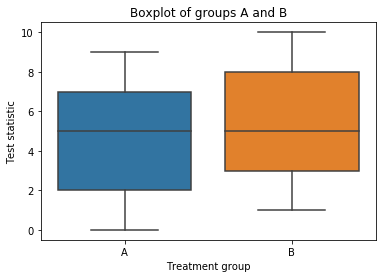

In [2]:
# creating some statistically significant data
group_a = np.random.randint(0,10, size=1000)
group_b = np.random.randint(1,11, size=1000)
mean_dif = group_a.mean() - group_b.mean()

print('Observed mean diff', mean_dif)

# plot with seaborn
ax = sns.boxplot(x=['A', 'B'], y=[group_a, group_b])
plt.title('Boxplot of groups A and B')
plt.xlabel('Treatment group')
plt.ylabel('Test statistic')
plt.show()

Mean: -0.4365849
SD: 0.065047636329


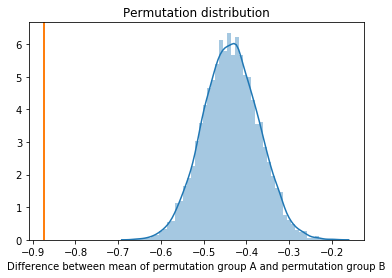

In [3]:
group_a_b = np.concatenate((group_a,group_b))
permutation_means = []

for _ in range(10000):
    np.random.shuffle(group_a_b)
    group_a_i = group_a_b[:1000]
    group_a = group_a_b[1000:]
    mean_dif_i = group_a.mean() - group_b.mean()
    permutation_means.append(mean_dif_i)

print('Mean:', np.mean(permutation_means))
print('SD:', np.std(permutation_means))
    
# plot with seaborn
ax = sns.distplot(permutation_means)
plt.title('Permutation distribution')
plt.xlabel('Difference between mean of permutation group A and permutation group B')
plt.plot([mean_dif, mean_dif],[0,8], linewidth=2)
plt.show()

The observed statistic (difference between mean of group A and mean of group B) is in fact outside most of the permutation distribution.

This means our observed difference is *statistically significant*.

### Exhaustive and bootstrap permutation test

*Exhaustive*, or *exact* permuation tests checks every possible permutation

Only possible with smaller sample sizes

*Bootstrap* permutation test is sampling *with replacement*

This way we model not just the random element of assigning treatment to subject, but also the random element of selecting subjects from the population.

### Permutation tests: bottom line for data science

A useful heuristic procedure for exploring role of random variation

"One size fits all" approach to inference - can accomodate different sample sizes, data types, etc.

- permutation test combines multiple samples and shuffles
- shuffled values are then divided into resamples, and statistic is calculated
- process is repeated, and resampled statistic is tabulated
- comparing the observed value of the statistic to the resampled distribution allows you to to judge whether an observed difference between samples might occur by chance

---

## Statistical significance and P-values

- **P-value** - given a chance model that embodies the null hypothesis, the p-value is the probability of obtaining results as unusual or extreme as the observed results

- **Alpha** - probability threshold of "unusualness" that chance results must surpass, for actual outcomes to be deemed statistically significant

- **Type 1 error** - mistakenly concluding an effect is real, when it's actually due to chance

- **Type 2 error** - mistakenly concluding an effect is due to chance, when it's actually real

*Statistical significance* is how you measure whether an experiment yields a result more extreme than what chance might produce.

In [4]:
web_test_results = pd.DataFrame({'Price A':[200,23539],'Price B':[182,22406]}, index=['Conversion','No conversion'])

web_test_results

,Price A,Price B
Conversion,200,182
No conversion,23539,22406


In [5]:
conversion_rate = web_test_results.loc['Conversion',] / (web_test_results.loc['No conversion',] + web_test_results.loc['Conversion',])

print(conversion_rate)

observed_difference = (conversion_rate['Price A'] - conversion_rate['Price B'])

print('Conversion rate difference:',observed_difference)

Price A    0.008425
Price B    0.008057
dtype: float64
Conversion rate difference: 0.000367579118206


"If the 2 prices share the same conversion rate, could chance produce a difference like this?"

- combine samples and shuffle
- select new sample of size of group A, and of group B
- record the statistic for each group, and the difference between groups
- repeat R times
- note how often the difference was above/below a certain threshhold

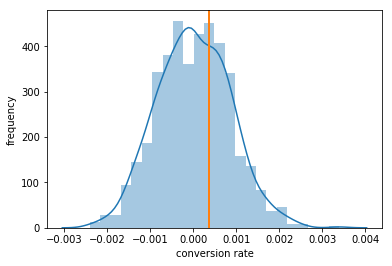

In [6]:
num_ones = web_test_results.loc['Conversion',].sum()
num_zeros = web_test_results.loc['No conversion',].sum()
a_size = web_test_results['Price A'].sum()
b_size = web_test_results['Price B'].sum()

all_data = [1] * num_ones + [0] * num_zeros
diffs = []

def proportion(x):
    return sum(x) / len(x)

for _ in range(1000):
    np.random.shuffle(all_data)
    diffs.append(proportion(all_data[:a_size]) - proportion(all_data[a_size:]))
    
# plot with seaborn
ax = sns.distplot(diffs)
plt.xlabel('conversion rate')
plt.ylabel('frequency')
plt.plot([observed_difference, observed_difference],[0,500], linewidth=2)
plt.show()

We see that the observed difference is well within the range of chance variation.

### P-value

*P-value* is the frequency with which the chance model produces a result more extreme than the observed result

In [8]:
###
### this could use more work...

z_score = (observed_difference - np.mean(diffs)) / np.std(diffs)

# if we assume the data is normally distributed
p_value = 1 - stats.norm.cdf(z_score)

print('P-value', p_value)

P-value 0.340164902288


### Alpha

Specify a threshold in advance what is "unusual"

E.g. "more extreme than 5% of the chance (null hypothesis) results"

Typical alpha levels are 5% and 1%

#### Value of the p-value

P-value has some controversy. It can be "gamed"

### Type 1 and Type 2 errors

Type 1 error - mistakenly concluding an effect is real, when it's actually due to chance

Type 2 error - mistakenly concluding an effect is due to chance, when it's actually real


Type 2 error could come from needing a larger sample size

Basic function of *hypothesis tests* is to protect from Type 1 error

### Data science and p-values

But basically, p-values are less useful for data science than for classic statistics.

It can let you check a model result that looks interesting, check if it's within the normal chance variability range.

Or maybe it's used as an intermediate input in some other model, e.g. ML.

- significance/hypothesis tests determine whether something you see could be just a chance effect
- p-value is the probability that results as extreme as the observation might occur by chance
- alpha value is the threshold of unusualness willing to accept
- significance testing is more relevant in formal research than data science (and is even fading in the former)

---

## t-tests

- **Test statistic** - metric for the difference or effect of interest

- **t-statistic** - standardized version of the test statistic

- **t-distribution** - reference distribution to which the observed t-statistic can be compared

Different ways to do significance tests

Common way is the *t-test*, named after Student's t-distribution

All significance/hypothesis tests require you specify a *test statistic* to measure the effect you're interested in

In a resampling test (see permutation test), scale of the data doesn't matter. The reference distribution is created from the data itself through resampling.

But it wasn't always feasible to randomly shuffle data thousands of times to do resampling tests.

*t-test* was a good approximation of doing resampling/permutation.

Used for an A/B numeric comparison

In order to ignore scale, you have to standardize the test statistic.

In [12]:
# pure python
# https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f

#Sample Size
N = 10

#Gaussian distributed data with mean = 2 and var = 1
a = np.random.randn(N) + 2

#Gaussian distributed data with with mean = 0 and var = 1
b = np.random.randn(N)

#For unbiased max likelihood estimate we have to divide the var by N-1, and therefore the parameter ddof = 1
var_a = a.var(ddof=1)
var_b = b.var(ddof=1)

#std deviation
s = np.sqrt( ( var_a + var_b ) / 2 )

## Calculate the t-statistics
t = ( a.mean() - b.mean() ) / ( s * np.sqrt( 2 / N ) )

# Compare with the critical t-value
#Degrees of freedom
df = 2*N - 2

#p-value after comparison with the t 
p = 1 - stats.t.cdf(t,df=df)

print("t = " + str(t))
print("p = " + str(2*p))

t = 3.81256298624
p = 0.00127518537822


In [13]:
### with scipy.stats
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(2*p2))

t = 3.81256298624
p = 0.00255037075644


Resampling sidesteps many of the questions around which variation of hypothesis test to use.

Data scientists traditionally don't need to use these techniques as much as classical statisticians.

- before computers, resampling was not practical and standard reference distributions were used
- test statistics could be standardized and compared to reference distribution
- one such widely used standardized statistic is the t-statistic

---

## Multiple testing

- **Type 1 error** - mistakenly concluding an effect is signicicant

- **False discovery rate** - across multiple tests, rate of making Type 1 error

- **Adjustment of p-values** - accounding for doing multiple tests on the same data

- **Overfitting** - fitting the noise


"Torturing the data" until it tells you something is a real risk.

Multiplicity issues

More research doesn't always mean better research

Related to overfitting data in data mining/ML modeling

- multiplicity in a rproject (multiple comparisons, many variables, many models, etc.) increases risk of Type 1 error
- for if doing multiple statistical comparisons, there are adjustment procedures
- in data mining, having a labeled "holdout" sample can avoid misleading results

---

## Degrees of freedom

- **n or sample size** - number of observations (rows/records) in the data

- **d.f.** - degrees of freedom

Used to free estimates of bias

But in data science, data is often so large that n vs. n - 1 doesn't mean much

However, it does play into regression (linear and logistic).

For example, there are *multicollinearity* errors.

- number of d.f. forms part of the calculation to standardize test statistics so they can be compared to reference distributions
- concept of d.f. lies behind factoring of categorical variables into "dummy variables" when doing a regression (to avoid multicollinearity)

---

## ANOVA

- **Pairwise comparison** - lorem
